In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
from sklearn.datasets import load_diabetes

(X,y)=load_diabetes(return_X_y=True,as_frame=True)

In [3]:
d=X
d.insert(0,'res',y)

In [4]:
d['male']=(d['sex']>0).astype('int')
d['female']=(d['sex']<0).astype('int')
d=d.drop('sex',axis=1)

In [5]:
d.head()

,res,age,bmi,bp,s1,s2,s3,s4,s5,s6,male,female
0,151.0,0.038076,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,1,0
1,75.0,-0.001882,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,0,1
2,141.0,0.085299,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,1,0
3,206.0,-0.089063,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,0,1
4,135.0,0.005383,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,0,1


In [6]:
X=d.drop('res',axis=1)
y=d['res']

# Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lr=LinearRegression()
lr.fit(X,y)

LinearRegression()

In [10]:
print('Linear Regression cv mse:')
print(-cross_val_score(lr,X,y,scoring='neg_mean_squared_error').mean())

Linear Regression cv mse:
2993.0729432998855


# Backward selection of features based on cross validation
Start with a full set of features, drop one feature at a time: the feature that leads to the lowest cv-MSE

In [44]:
def Backward_Selection(X,y,cv):
    
    best_score=-cross_val_score(LinearRegression(),X,y,scoring='neg_mean_squared_error').mean()
    best_subset=X.columns
    
    Curr_Cols=X.columns
    
    while len(Curr_Cols)>=1:
        print('Current features:',str(Curr_Cols))
        score_list=[]
        for i,col in enumerate(Curr_Cols):
            current_score=-cross_val_score(LinearRegression(),X.drop(col,axis=1),y,scoring='neg_mean_squared_error').mean()
            score_list.append(current_score)
        idx_to_drop=score_list.index(min(score_list))
        print('   Feature dropped at this stage',str(Curr_Cols[idx_to_drop]))
        print('   Resulting cv MSE=',score_list[idx_to_drop])
        print('')
        
        Curr_Cols=Curr_Cols.drop(Curr_Cols[idx_to_drop])
        
        if score_list[idx_to_drop]<best_score:
            best_score=score_list[idx_to_drop]
            best_subset=Curr_Cols
    
    return best_score,best_subset

In [51]:
best_score,best_subset=Backward_Selection(X,y,5);

print('best subset of features based on Backward Selection:')
print(best_subset)
print('')
print('best subset of features, cv MSE=')
print(best_score)

Current features: Index(['age', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'male',
       'female'],
      dtype='object')
   Feature dropped at this stage s6
   Resulting cv MSE= 2961.095041971423

Current features: Index(['age', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 'male', 'female'], dtype='object')
   Feature dropped at this stage age
   Resulting cv MSE= 2972.2897503840927

Current features: Index(['bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 'male', 'female'], dtype='object')
   Feature dropped at this stage s3
   Resulting cv MSE= 2988.696872257602

Current features: Index(['bmi', 'bp', 's1', 's2', 's4', 's5', 'male', 'female'], dtype='object')
   Feature dropped at this stage male
   Resulting cv MSE= 2993.072943299892

Current features: Index(['bmi', 'bp', 's1', 's2', 's4', 's5', 'female'], dtype='object')
   Feature dropped at this stage female
   Resulting cv MSE= 2993.0729432998924

Current features: Index(['bmi', 'bp', 's1', 's2', 's4', 's5'], dtype='object')
   F

# Select the best subset of regressors based on cross-validation

In [11]:
# # best subset for regression

# import itertools
# def best_subset(X,y,cv):
    
#     subsets=itertools.chain.from_iterable(itertools.combinations(X.columns,r) for r in range(len(X.columns)+1))
    
#     best_score=+np.inf
#     best_subset=None
    
#     for subset in subsets:
        
#         score=-cross_val_score(LinearRegression(),X=X[list(subset)],y=y,cv=cv,scoring='neg_mean_squared_error').mean()
#         # print('     '+str(subset)+'     '+str(score))
#         if score<best_score:
#             best_score=score
#             best_subset=subset
#     return best_score,best_subset

# best_subset(X,y,5)


# Elastic Net

In [52]:
# Other Regression Based Methods

# elastic net
from sklearn.linear_model import ElasticNet,Ridge


print('Elastic Net default hyperparameter cv MSE:')
print(-cross_val_score(ElasticNet(),X,y,scoring='neg_mean_squared_error').mean())

print('')

# best elastic net
from sklearn.model_selection import GridSearchCV
en_best=GridSearchCV(estimator=en,
                     param_grid={'alpha':np.linspace(0.1,10,20),'l1_ratio':np.linspace(0.1,1,10)},
                     scoring='neg_mean_squared_error',cv=5)

en_best.fit(X,y)

print('Elastic Net best hyperparameter cv MSE')
print(-en_best.best_score_)

Elastic Net default hyperparameter cv MSE:
5935.509539057706

Elastic Net best hyperparameter cv MSE
2998.1818408293548


In [56]:
# Ridge Regression: base version

print('Ridge Regression default hyperparameter cv MSE:')
print(-cross_val_score(Ridge(),X,y,cv=5,scoring='neg_mean_squared_error').mean())

print('')

rr_best=GridSearchCV(estimator=Ridge(),
                     param_grid={'alpha':np.linspace(0.001,10,10)},
                     scoring='neg_mean_squared_error',
                     cv=5)
rr_best.fit(X,y)

print('best Ridge, alpha=',str(rr_best.best_params_))
print('')

print('Ridge Regression best hyperparameter cv MSE:')
print(-rr_best.best_score_)

Ridge Regression default hyperparameter cv MSE:
3385.059238504138

best Ridge, alpha= {'alpha': 0.001}

Ridge Regression best hyperparameter cv MSE:
2993.0791355104548


# Decision Tree

Decision Tree default parameter cv MSE:
6737.005464759959


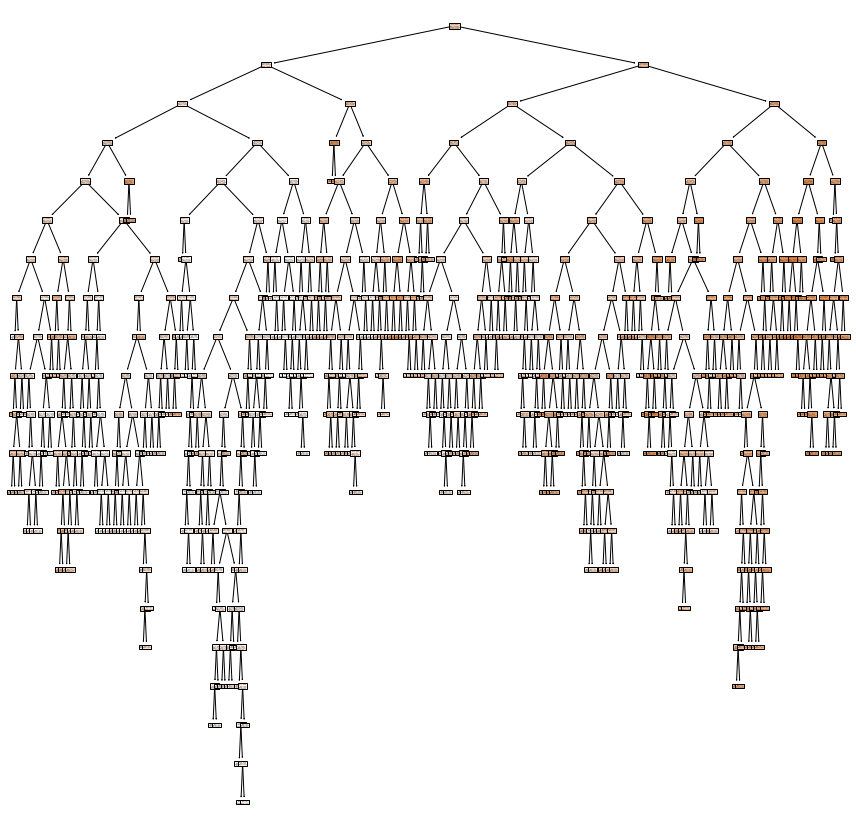

In [61]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

tr=DecisionTreeRegressor()
tr.fit(X,y)

plt.subplots(figsize=(15,15))
plot_tree(tr,
         filled=True,
         proportion=True,
         feature_names=X.columns);


print('Decision Tree default parameter cv MSE:')
print(-cross_val_score(tr,X,y,cv=5,scoring='neg_mean_squared_error').mean())

In [63]:
best_tree=GridSearchCV(tr,
                       param_grid={'max_depth':np.linspace(1,10,10)},
                       cv=5,scoring='neg_mean_squared_error')
best_tree.fit(X,y)

print('Decision Tree best parameters:')
print(best_tree.best_params_)

print('')
print('Decision Tree best parameters cv MSE:')
print(-best_tree.best_score_)

Decision Tree best parameters:
{'max_depth': 2.0}

Decision Tree best parameters cv MSE:
3883.717765999007


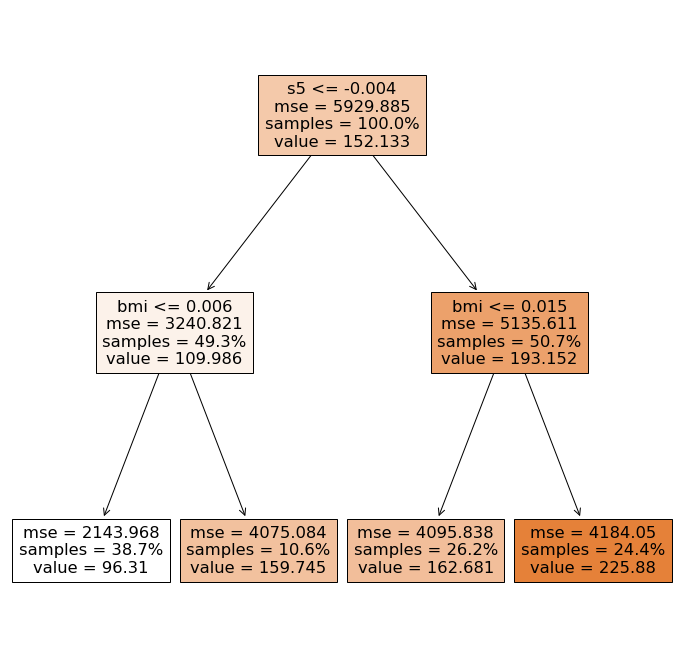

In [65]:
plt.subplots(figsize=(12,12))
plot_tree(DecisionTreeRegressor(max_depth=best_tree.best_params_['max_depth']).fit(X,y),
         filled=True,
         proportion=True,
         feature_names=X.columns);



# Random Forest

In [67]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor()
rf.fit(X,y)

print('Random Forest default parameter cv MSE:')
print(-cross_val_score(rf,X,y,cv=5,scoring='neg_mean_squared_error').mean())

Random Forest default parameter cv MSE:
3330.332228051583


<AxesSubplot:>

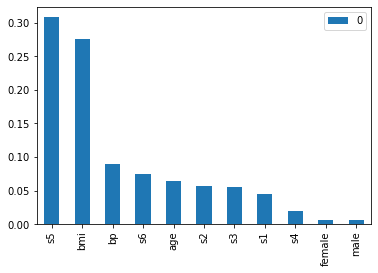

In [68]:
fi=pd.DataFrame(rf.feature_importances_,index=X.columns)
fi.sort_values(by=0,ascending=False).plot(kind='bar')

In [69]:
best_rf=GridSearchCV(estimator=rf,
                    param_grid={'max_depth':range(2,10)},
                    cv=5,
                    scoring='neg_mean_squared_error')
best_rf.fit(X,y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': range(2, 10)},
             scoring='neg_mean_squared_error')

In [71]:
print('Random Forest, best parameters:')
print(best_rf.best_params_)
print('')
print('Random Forest, best parameters cv MSE:')
print(-best_rf.best_score_)

Random Forest, best parameters:
{'max_depth': 4}

Random Forest, best parameters cv MSE:
3240.3947317123134


<AxesSubplot:>

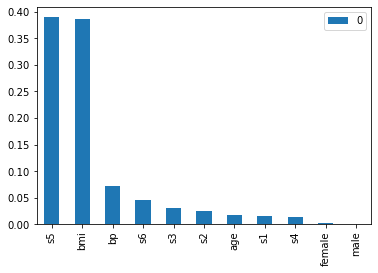

In [72]:
rf1=RandomForestRegressor(max_depth=4).fit(X,y)
vi=pd.DataFrame(rf1.feature_importances_,index=X.columns)
vi.sort_values(0,ascending=False).plot(kind='bar')

# KNeighborsRegressor

In [73]:
from sklearn.neighbors import KNeighborsRegressor

knr=KNeighborsRegressor()
knr.fit(X,y)

print('KNeighborsRegressor default parameter, cv MSE=')
-cross_val_score(knr,X,y,cv=5,scoring='neg_mean_squared_error').mean()

KNeighborsRegressor default parameter, cv MSE=


3606.482989785495

In [74]:
best_knr=GridSearchCV(knr,
                     param_grid={'n_neighbors':range(1,10)},
                     cv=5,
                     scoring='neg_mean_squared_error')
best_knr.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 10)},
             scoring='neg_mean_squared_error')

In [78]:
print('KNeighborRegressor best parameter:')
print(best_knr.best_params_)

print('')

print('KNeighborRegressor best parameter cv MSE:')
print(-best_knr.best_score_)

KNeighborRegressor best parameter:
{'n_neighbors': 9}

KNeighborRegressor best parameter cv MSE:
3304.1126410799634


# Gradient Boosting

In [79]:
from sklearn.ensemble import GradientBoostingRegressor

b=GradientBoostingRegressor()
b.fit(X,y)

print('Gradient Boosting default parameter cv MSE:')
-cross_val_score(b,X,y,cv=5,scoring='neg_mean_squared_error').mean()

Gradient Boosting default parameter cv MSE:


3418.0955538771145

In [82]:
best_b=GridSearchCV(b,
                   param_grid={'max_depth':range(1,20)},
                   cv=5,
                   scoring='neg_mean_squared_error')
best_b.fit(X,y)

print('Gradient Boosting best parameters:')
print(best_b.best_params_)

print('')

print('Gradient Boosting best parameters cv MSE:')
print(-best_b.best_score_)

Gradient Boosting best parameters:
{'max_depth': 1}

Gradient Boosting best parameters cv MSE:
3197.576566053306
